# Validation

### Read json file

In [5]:
import json
from matplotlib import pyplot as plt
logs_file = "E:\\OneDrive - Universitat de les Illes Balears\\2021-2022\\TFM\\training_logs\\3r entrenament\\None.log.json"

n_epochs = 10
iter_batch_size = 5

In [6]:
results = []
with open(logs_file) as f:
    for line in f.readlines():
        results.append(json.loads(line))
results = [line for line in results if 'mode' in line]

In [7]:
results = [line for line in results if 'mode' in line]
results_val = [line for line in results if line['mode'] == "val"]
results_train = [line for line in results if line['mode'] == "train"]

## Training loss

In [8]:
def smooth(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

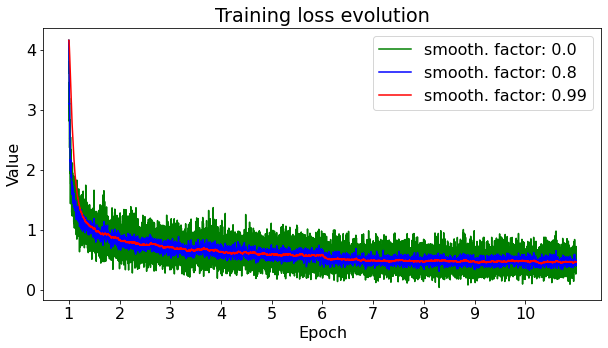

In [14]:
iter_per_epoch = len(results_train) * iter_batch_size / n_epochs
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['font.size'] = 16
plt.plot([(line['epoch'] - 1) + line['iter'] / iter_per_epoch for line in results_train], smooth([line['loss'] for line in results_train], 0), color='green', label="smooth. factor: 0.0")
plt.plot([(line['epoch'] - 1) + line['iter'] / iter_per_epoch for line in results_train], smooth([line['loss'] for line in results_train], 0.8), color='blue', label="smooth. factor: 0.8")
plt.plot([(line['epoch'] - 1) + line['iter'] / iter_per_epoch for line in results_train], smooth([line['loss'] for line in results_train], 0.99), color='red', label="smooth. factor: 0.99")
plt.title("Training loss evolution")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.xticks(range(n_epochs), [str(v+1) for v in range(n_epochs)])
plt.legend(loc="upper right")
plt.show()

## Validation

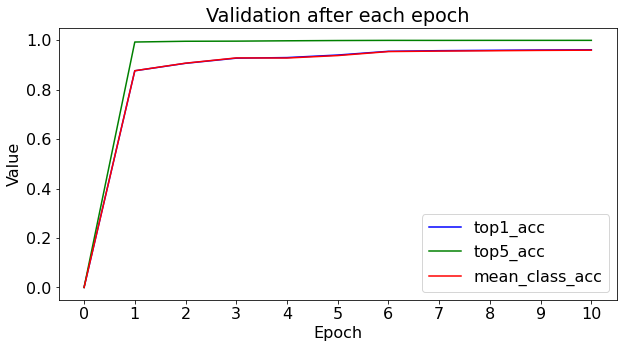

In [15]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['font.size'] = 16
plt.plot([0] + [line['top1_acc'] for line in results_val], color='blue', label="top1_acc")
plt.plot([0] + [line['top5_acc'] for line in results_val], color='green', label="top5_acc")
plt.plot([0] + [line['mean_class_accuracy'] for line in results_val], color='red', label="mean_class_acc")
plt.title("Validation after each epoch")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.xticks(range(n_epochs + 1), [str(v) for v in range(n_epochs + 1)])
plt.legend(loc="lower right")
plt.show()

In [12]:
[line['top1_acc'] for line in results_val]

[0.87627,
 0.9065,
 0.92728,
 0.92972,
 0.93998,
 0.95507,
 0.9576,
 0.95902,
 0.96031,
 0.9612]

In [13]:
[line['mean_class_accuracy'] for line in results_val]

[0.87648,
 0.90703,
 0.9283,
 0.92785,
 0.93776,
 0.954,
 0.9559,
 0.95722,
 0.95872,
 0.95964]